In [10]:
import cv2
import numpy as np
import os

import datetime
from skimage import io
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
import glob


In [11]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam


# model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,120, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(6, activation='softmax'))

# model summary
optimiser = Adam() 
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 118, 32)       320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 98, 118, 32)       128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 59, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 49, 59, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 57, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 47, 57, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 28, 64)       

In [13]:
DATASET_PATH = r'database/'

dataset_path = os.path.join(DATASET_PATH, '*')
import glob
dataset_path = glob.glob(dataset_path)
dataset_path

['database\\blank',
 'database\\five',
 'database\\four',
 'database\\one',
 'database\\three',
 'database\\two']

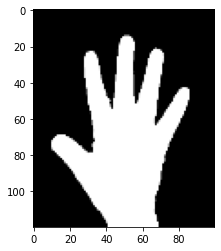

In [14]:
import cv2
image = cv2.imread(r'database/five/five_25.png')
image = cv2.resize(image,(100, 120))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [15]:
loaded_images = []
m=35 # number of images

list_of_gestures = ['one', 'two', 'three', 'four', 'five', 'blank']

for path in range(0, len(list_of_gestures)):
    dataset_path = "database/" + str(list_of_gestures[path])
    gesture_path = os.path.join(dataset_path, '*')
    print(gesture_path)
    import glob
    gest_path = glob.glob(gesture_path)
    k = 0
    for i in range(0, len(gest_path)):
        if k < m:
            image = cv2.imread(gest_path[i])
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image,(100, 120))
            loaded_images.append(gray_image)
        k=k+1
print(len(loaded_images))

outputVectors = []
for i in range(0, m):
    outputVectors.append([1, 0, 0, 0, 0, 0])

for i in range(0, m):
    outputVectors.append([0, 1, 0, 0, 0, 0])

for i in range(0, m):
    outputVectors.append([0, 0, 1, 0, 0, 0])
    
for i in range(0, m):
    outputVectors.append([0, 0, 0, 1, 0, 0])
    
for i in range(0, m):
    outputVectors.append([0, 0, 0, 0, 1, 0])

for i in range(0, m):
    outputVectors.append([0, 0, 0, 0, 0, 1])

print(len(outputVectors))

database/one\*
database/two\*
database/three\*
database/four\*
database/five\*
database/blank\*
210
210


In [16]:
X = np.asarray(loaded_images)
y = np.asarray(outputVectors)
print(X.shape)
print(y.shape)

(210, 120, 100)
(210, 6)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)
print(X_train.shape)
print(X_test.shape)

(168, 100, 120, 1)
(42, 100, 120, 1)


In [18]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=2,
          verbose=1,
          validation_data=(X_test, y_test))

model.save("numbers.h5")

Epoch 1/2
2/2 [==============================] - 15s 8s/step - loss: 8.4359 - categorical_accuracy: 0.1786 - val_loss: 46.4109 - val_categorical_accuracy: 0.4762
Epoch 2/2
2/2 [==============================] - 5s 2s/step - loss: 10.0099 - categorical_accuracy: 0.6071 - val_loss: 15.6156 - val_categorical_accuracy: 0.6667


In [19]:
[loss, acc] = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy: " + str(acc))

2/2 [==============================] - 0s 26ms/step - loss: 15.6156 - categorical_accuracy: 0.6667
Accuracy: 0.6666666865348816
